In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
import math

import matplotlib.pyplot as plt

In [10]:
# r_n function
def r(n, D):
    return n ** (-1/(2*D))

In [16]:
lengths = []

filename = 'slurm scripts/data/06-17-20/asymptotics-dim2_n50000-'

for i in range(1,6):
    f = open(filename+str(i)+'.out', "r")
    for line in f:
        lengths.append(float(line))
        
lengths = np.array(lengths)

In [17]:
# T_n approaches 1.5 (true length) n^(1/4)

n = 50000
D = 2

T = 1.5 * (2 ** 0.5) * 0.8 * (n ** 0.25)
print(T)

25.376910322573544


In [14]:
lengths = lengths - (T * (2/3) * r(n,D))
lengths = lengths * (n ** 1/8)

In [18]:
lengths

array([1.13138797, 1.13140157, 1.13138212, 1.1313958 , 1.13139181,
       1.13140694, 1.13141546, 1.13139972, 1.13140882, 1.13142828,
       1.13140164, 1.13162617, 1.13140311, 1.13141567, 1.13139758,
       1.13140352, 1.13139809, 1.13139881, 1.13140457, 1.13143728,
       1.13138754, 1.13144139, 1.13139157, 1.13138945, 1.13139081,
       1.1314073 , 1.13139538, 1.13138742, 1.13140033, 1.13138262,
       1.13139077, 1.13141417, 1.13140613, 1.13138208, 1.13141118,
       1.13139007, 1.13139004, 1.13139731, 1.13138803, 1.13139253,
       1.13140162, 1.13142666, 1.13138819, 1.13141281, 1.13137897,
       1.13141066, 1.13138769, 1.1314007 , 1.13139647, 1.13140223,
       1.13140322, 1.13139732, 1.13139013, 1.13141753, 1.13139715,
       1.13140162, 1.131389  , 1.13138252, 1.13139036, 1.1313975 ,
       1.13139968, 1.13140546, 1.13139908, 1.13141704, 1.13138909,
       1.13141327, 1.13142342, 1.13140051, 1.13146539, 1.13140657,
       1.13141251, 1.1314163 , 1.13141328, 1.13140107, 1.13141

In [19]:
lengths = lengths - (T * (2/3) * r(n,D))
lengths

array([1.71213437e-05, 3.07157646e-05, 1.12730745e-05, 2.49501162e-05,
       2.09562594e-05, 3.60932361e-05, 4.46120971e-05, 2.88748308e-05,
       3.79705881e-05, 5.74347001e-05, 3.07904258e-05, 2.55317323e-04,
       3.22559223e-05, 4.48207759e-05, 2.67294986e-05, 3.26652822e-05,
       2.72425720e-05, 2.79619780e-05, 3.37184223e-05, 6.64262429e-05,
       1.66858661e-05, 7.05445282e-05, 2.07231720e-05, 1.85997852e-05,
       1.99629478e-05, 3.64495729e-05, 2.45327198e-05, 1.65740991e-05,
       2.94843359e-05, 1.17728118e-05, 1.99152664e-05, 4.33222454e-05,
       3.52772596e-05, 1.12275064e-05, 4.03314889e-05, 1.92250540e-05,
       1.91860619e-05, 2.64560319e-05, 1.71807377e-05, 2.16794744e-05,
       3.07657044e-05, 5.58091245e-05, 1.73369853e-05, 4.19608990e-05,
       8.11977618e-06, 3.98075087e-05, 1.68408125e-05, 2.98474674e-05,
       2.56191182e-05, 3.13768938e-05, 3.23669764e-05, 2.64654428e-05,
       1.92802416e-05, 4.66840824e-05, 2.63009997e-05, 3.07708752e-05,
      

In [20]:
lengths = lengths * (n ** 1/8)
lengths

array([0.1070084 , 0.19197353, 0.07045672, 0.15593823, 0.13097662,
       0.22558273, 0.27882561, 0.18046769, 0.23731618, 0.35896688,
       0.19244016, 1.59573327, 0.20159951, 0.28012985, 0.16705937,
       0.20415801, 0.17026607, 0.17476236, 0.21074014, 0.41516402,
       0.10428666, 0.4409033 , 0.12951983, 0.11624866, 0.12476842,
       0.22780983, 0.1533295 , 0.10358812, 0.1842771 , 0.07358007,
       0.12447042, 0.27076403, 0.22048287, 0.07017192, 0.25207181,
       0.12015659, 0.11991289, 0.1653502 , 0.10737961, 0.13549672,
       0.19228565, 0.34880703, 0.10835616, 0.26225562, 0.0507486 ,
       0.24879693, 0.10525508, 0.18654667, 0.16011949, 0.19610559,
       0.2022936 , 0.16540902, 0.12050151, 0.29177551, 0.16438125,
       0.19231797, 0.11343703, 0.07294671, 0.12192439, 0.1665745 ,
       0.18021581, 0.21634091, 0.17646936, 0.28868256, 0.11403081,
       0.26514258, 0.32858675, 0.18538466, 0.59089572, 0.2232658 ,
       0.26037583, 0.28404519, 0.26516073, 0.18884457, 0.24764

(array([152.,  66.,  10.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.0507486 , 0.20524707, 0.35974553, 0.514244  , 0.66874247,
        0.82324093, 0.9777394 , 1.13223787, 1.28673633, 1.4412348 ,
        1.59573327]),
 <a list of 10 Patch objects>)

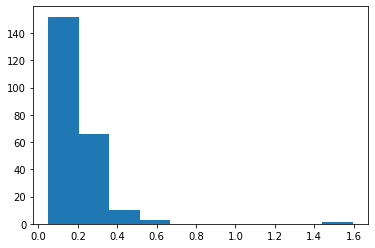

In [21]:
plt.hist(lengths)